In [8]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
def oracle_search(d,start,goal,max_no_goalcutoff):
    '''
    params d=the adjacency dict,goal=goal node <str>,max_no_goalcutoff=set this as MAX_LIMIT to get all paths to goals or you can restrict the paths accessed
    returns oracle cost This will be the boilerplate code for all algos and further tweak done to specific algos  ....
    '''
    queue=[[0,start]]
    res=[]
    g=goal
    f=0
    n_g=max_no_goalcutoff
    while (len(queue)!=0):
        tmp=[]
        curr=queue.pop(0)         # This is the list of paths with index 0 storing cumulative cost
        currnode=curr[-1]           # This is the last node in the traversed path
        for i in d[currnode].keys():
            if i in curr:continue   # prevent accessing ancesstors to child
            tmp1=curr+list(i)
            tmp1[0]=curr[0]+d[currnode][i]
            tmp.append(tmp1)
            queue.append(tmp1)
            queue.sort(key=lambda k1:k1[0])   # Should have used a priority queue but sort works !
            if g==i:f+=1
        for i in tmp:res.append(i)
        if(f==n_g):break
    print(res)
    goal_node=[]
    for i in res:
        if 'G' in i:goal_node.append(i)
    print('Oracle Paths:',goal_node)
    return goal_node[0][0] # return oracle cost for B&b

In [5]:
def BMS(d,start,goal,max_no_goalcutoff):
    queue=[[start]]
    #print(queue[-1][-1])
    res=[]
    g=goal
    f=0
    n_g=max_no_goalcutoff
    while (len(queue)!=0):
        tmp=[]
        curr=queue.pop(0)
        currnode=curr[-1][-1]
        for i in d[currnode].keys():
            if i in curr:continue
            tmp1=curr+list(i)
            #tmp1[0]=curr[0]+d[currnode][i]
            tmp.append(tmp1)
            queue.append(tmp1)
            queue.sort(key=lambda k1:ord(k1[-1]))
            if g==i:f+=1
        for i in tmp:res.append(i)
        if(f==n_g):break
    print(res)
    goal_node=[]
    for i in res:
        if 'G' in i:goal_node.append(i)
    print('BMS Paths:',goal_node)
    return res
BMS(d,'S','G',2)

[['S', 'A'], ['S', 'B'], ['S', 'A', 'B'], ['S', 'A', 'D'], ['S', 'B', 'A'], ['S', 'B', 'C'], ['S', 'B', 'A', 'D'], ['S', 'A', 'B', 'C'], ['S', 'B', 'C', 'E'], ['S', 'A', 'B', 'C', 'E'], ['S', 'A', 'D', 'G'], ['S', 'B', 'A', 'D', 'G']]
BMS Paths: [['S', 'A', 'D', 'G'], ['S', 'B', 'A', 'D', 'G']]


[['S', 'A'],
 ['S', 'B'],
 ['S', 'A', 'B'],
 ['S', 'A', 'D'],
 ['S', 'B', 'A'],
 ['S', 'B', 'C'],
 ['S', 'B', 'A', 'D'],
 ['S', 'A', 'B', 'C'],
 ['S', 'B', 'C', 'E'],
 ['S', 'A', 'B', 'C', 'E'],
 ['S', 'A', 'D', 'G'],
 ['S', 'B', 'A', 'D', 'G']]

In [194]:
def beamsearch(d,start,end,bw):
    queue=[[0,start]]
    fr=[]
    goal=end
    Beam=bw
    gn=[]
    f=0
    #print(queue)
    n_g=0
    f=n_g
    while(len(queue)!=0):
        print(queue)
        tmp=queue.copy()
        sl=[]
        for j in range(len(tmp)):
            cp=queue.pop(0)
            n=cp[-1]
            for i in d[n].keys():    # SAme loops as oracle search 
                #print(i)
                if i in cp:
                    continue
                el=cp+[i]
                el[0]+=d[n][i]
                sl.append(el)
                #queue.append(el)
                sl.sort(key=lambda x: x[0])
                if goal==i:
                    f=1
                    gn=el
        queue=sl
        if f==1:
            fr.append(queue.copy())
            break
        queue=queue[:Beam+2]
        fr.append(queue.copy())
    print(fr)
    print(gn)

beamsearch(d,'S','G',2)   

[[0, 'S']]
[[3, 'S', 'A'], [5, 'S', 'B']]
[[6, 'S', 'A', 'D'], [7, 'S', 'A', 'B'], [9, 'S', 'B', 'A'], [9, 'S', 'B', 'C']]
[[[3, 'S', 'A'], [5, 'S', 'B']], [[6, 'S', 'A', 'D'], [7, 'S', 'A', 'B'], [9, 'S', 'B', 'A'], [9, 'S', 'B', 'C']], [[11, 'S', 'A', 'D', 'G'], [11, 'S', 'A', 'B', 'C'], [12, 'S', 'B', 'A', 'D'], [15, 'S', 'B', 'C', 'E']]]
[11, 'S', 'A', 'D', 'G']


In [137]:
def bfs(d,start,end):
    queue=[[0,start]]
    fr=[]
    goal=end
    gn=[]
    f=0
    #print(queue)
    n_g=0
    f=n_g
    while(len(queue)!=0):
        print(queue)
        tmp=queue.copy()
        sl=[]
        for j in range(len(tmp)):
            cp=queue.pop(0)
            n=cp[-1]
            for i in d[n].keys():    # SAme loops as oracle search 
                #print(i)
                if i in cp:
                    continue
                el=cp+[i]
                el[0]+=d[n][i]
                sl.append(el)
                sl=sorted(sl)
                #sl.sort(key=lambda x: ord(x[-1]))
                if goal==i:
                    f=1
                    gn=el
        queue=sl
        if f==1:
            fr.append(queue.copy())
            break
        queue=queue[:]
        fr.append(queue.copy())
    print(fr)
    print(gn)
bfs(d,'S','G')

[[0, 'S']]
[[3, 'S', 'A'], [5, 'S', 'B']]
[[6, 'S', 'A', 'D'], [7, 'S', 'A', 'B'], [9, 'S', 'B', 'A'], [9, 'S', 'B', 'C']]
[[[3, 'S', 'A'], [5, 'S', 'B']], [[6, 'S', 'A', 'D'], [7, 'S', 'A', 'B'], [9, 'S', 'B', 'A'], [9, 'S', 'B', 'C']], [[11, 'S', 'A', 'B', 'C'], [11, 'S', 'A', 'D', 'G'], [12, 'S', 'B', 'A', 'D'], [15, 'S', 'B', 'C', 'E']]]
[11, 'S', 'A', 'D', 'G']


In [138]:
def dfs(d,start,end):
    queue=[[0,start]]
    path=[]
    while(len(queue)!=0):
        cp=queue.pop(0)
        cn=cp[-1]
        if cn==end:
            break
        else:
            for i in d[cn].keys():
                if i not in cp:
                    queue.append(cp+list(i))
            queue=sorted(queue)
            
            path.append(queue[0])
            
    print(path)
    return path
dfs(d,'S','G')

[[0, 'S', 'A'], [0, 'S', 'A', 'B'], [0, 'S', 'A', 'B', 'C'], [0, 'S', 'A', 'B', 'C', 'E'], [0, 'S', 'A', 'D'], [0, 'S', 'A', 'D', 'G']]


[[0, 'S', 'A'],
 [0, 'S', 'A', 'B'],
 [0, 'S', 'A', 'B', 'C'],
 [0, 'S', 'A', 'B', 'C', 'E'],
 [0, 'S', 'A', 'D'],
 [0, 'S', 'A', 'D', 'G']]

In [147]:

def hill_climb(d_heur,start,end):
    queue=[[0,start]]
    path=[]
    while(len(queue)!=0):
        cp=queue.pop(0)
        sl=[]
        #print(cp)
        cn=cp[-1]
        if cn==end:
            break
        else:
            for i in d[cn].keys():
                if i in cp :
                    continue
                el=cp+list(i)
                el[0]=d[cn][i]
                sl.append(el)
            
        
        sl.sort(key=lambda x:x[0],reverse=True) #Perform Similar to stack by LIFO by reversing the sorted queue
        #print(sl)#same thing as DFS but with heuristics
        
        for k in sl:
            print(k)
            queue.insert(0,k)
        
        path.append(queue[0])
    print(path)
hill_climb(d,'S','G')

[7.38, 'S', 'A']
[6, 'S', 'B']
[7.58, 'S', 'B', 'C']
[7.38, 'S', 'B', 'A']
[5, 'S', 'B', 'A', 'D']
[0, 'S', 'B', 'A', 'D', 'G']
[[6, 'S', 'B'], [7.38, 'S', 'B', 'A'], [5, 'S', 'B', 'A', 'D'], [0, 'S', 'B', 'A', 'D', 'G']]


In [167]:
def branch_and_bound(d,start,end,oracle):
    queue=[[0,start]]
    path=[]
    isgoal=0
    gn=[]
    while(len(queue)!=0):
        sl=[]
        cp=queue.pop(0)
        cn=cp[-1]
        if cn==end:
                gn=el
                break
        for i in d[cn].keys():
            #print(queue)
            if i in cp:
                continue
            
            elif cp[0]+d[cn][i]<=oracle:
                el=cp+list(i)
                el[0]+=d[cn][i]
                sl.append(el)
                sl.sort(key=lambda x:x[0])
                queue.append(el)
                
        
        sl.sort(key=lambda x:x[0])
        for i in sl:path.append(i)
        #print(sl)
        #if(isgoal==1):break
    print(path)
    return path
branch_and_bound(d,'S','G',11)

[[3, 'S', 'A'], [5, 'S', 'B'], [6, 'S', 'A', 'D'], [7, 'S', 'A', 'B'], [9, 'S', 'B', 'A'], [9, 'S', 'B', 'C'], [11, 'S', 'A', 'B', 'C'], [11, 'S', 'A', 'D', 'G']]


[[3, 'S', 'A'],
 [5, 'S', 'B'],
 [6, 'S', 'A', 'D'],
 [7, 'S', 'A', 'B'],
 [9, 'S', 'B', 'A'],
 [9, 'S', 'B', 'C'],
 [11, 'S', 'A', 'B', 'C'],
 [11, 'S', 'A', 'D', 'G']]

In [181]:
def branch_and_bound_EL(d,start,end,oracle):
    queue=[[0,start]]
    path=[]
    isgoal=0
    gn=[]
    vis=[]
    while(len(queue)!=0):
        sl=[]
        cp=queue.pop(0)
        cn=cp[-1]
        if cn==end:
                    
                gn=el
                break
        for i in d[cn].keys():
            #print(queue)
            if i in cp:
                continue
            elif cp[0]+d[cn][i]<=oracle and i not in vis: 
                vis.append(i)
                el=cp+list(i)
                el[0]+=d[cn][i]
                sl.append(el)
                sl.sort(key=lambda x:x[0])
                queue.append(el)
                
        
        sl.sort(key=lambda x:x[0])
        for i in sl:path.append(i)
        #print(sl)
        
    print(vis)
    return path
branch_and_bound_EL(d,'S','G',11)

['A', 'B', 'D', 'C', 'G']


[[3, 'S', 'A'],
 [5, 'S', 'B'],
 [6, 'S', 'A', 'D'],
 [9, 'S', 'B', 'C'],
 [11, 'S', 'A', 'D', 'G']]

In [182]:

def oracle_cost_heur(d,start,end,d_heuristic,max_no_goalcutoff):
    queue=[[0,start]]
    res=[]
    g='G'
    f=0
    n_g=max_no_goalcutoff
    while (len(queue)!=0):
        tmp=[]
        curr=queue.pop(0)         # This is the list of paths with index 0 storing cumulative cost
        currnode=curr[-1]           # This is the last node in the traversed path
        for i in d[currnode].keys():
            if i in curr:continue   # prevent accessing ancesstors to child
            tmp1=curr+list(i)
            tmp1[0]=curr[0]+d[currnode][i]+d_heuristic[currnode][i]
            tmp.append(tmp1)
            queue.append(tmp1)
            queue.sort(key=lambda k1:k1[0])   # Should have used a priority queue but sort works !
            if g==i:f+=1
        for i in tmp:res.append(i)
        if(f==n_g):break
    print(res)
    goal_node=[]
    for i in res:
        if end in i:goal_node.append(i)
    return goal_node[0][0]
    print('Oracle Paths:',goal_node)
oracle_cost_heur(d,'S','G',d_h,2)

[[10.379999999999999, 'S', 'A'], [11, 'S', 'B'], [20.38, 'S', 'A', 'B'], [18.38, 'S', 'A', 'D'], [22.38, 'S', 'B', 'A'], [22.58, 'S', 'B', 'C'], [23.38, 'S', 'A', 'D', 'G'], [31.96, 'S', 'A', 'B', 'C'], [30.38, 'S', 'B', 'A', 'D'], [inf, 'S', 'B', 'C', 'E'], [35.379999999999995, 'S', 'B', 'A', 'D', 'G']]


23.38

In [185]:
def A_star_search(d,start,end,d_heur,oracle_cost_heur):
    queue=[[0,start]]
    path=[]
    isgoal=0
    gn=[]
    vis=[]
    while(len(queue)!=0):
        sl=[]
        cp=queue.pop(0)
        cn=cp[-1]
        for i in d[cn].keys():
            #print(queue)
            if i in cp:
                continue
            elif cp[0]+d[cn][i]<=oracle_cost_heur and i not in vis : 
                vis.append(i)
                el=cp+list(i)
                el[0]+=d[cn][i]+d_heur[cn][i]
                sl.append(el)
                sl.sort(key=lambda x:x[0])
                queue.append(el)
                if cn==end:
                    isgoal=1
                    gn=el
                    break
        
        sl.sort(key=lambda x:x[0])
        for i in sl:path.append(i)
        #print(sl)
        if(isgoal==1):break
    print(vis)
    return path
A_star_search(d,'S','G',d_h,oracle_cost_heur(d,'S','G',d_h,2))

[[10.379999999999999, 'S', 'A'], [11, 'S', 'B'], [20.38, 'S', 'A', 'B'], [18.38, 'S', 'A', 'D'], [22.38, 'S', 'B', 'A'], [22.58, 'S', 'B', 'C'], [23.38, 'S', 'A', 'D', 'G'], [31.96, 'S', 'A', 'B', 'C'], [30.38, 'S', 'B', 'A', 'D'], [inf, 'S', 'B', 'C', 'E'], [35.379999999999995, 'S', 'B', 'A', 'D', 'G']]
['A', 'B']


[[10.379999999999999, 'S', 'A'], [11, 'S', 'B']]

[[10.379999999999999, 'S', 'A'], [11, 'S', 'B'], [20.38, 'S', 'A', 'B'], [18.38, 'S', 'A', 'D'], [22.38, 'S', 'B', 'A'], [22.58, 'S', 'B', 'C'], [23.38, 'S', 'A', 'D', 'G'], [31.96, 'S', 'A', 'B', 'C'], [30.38, 'S', 'B', 'A', 'D'], [inf, 'S', 'B', 'C', 'E'], [35.379999999999995, 'S', 'B', 'A', 'D', 'G']]
['A', 'B', 'D', 'C', 'G']
[[['S', 'A']], [['S', 'B']], [['S', 'A'], ['A', 'D']], [['S', 'B'], ['B', 'C']], [['S', 'A'], ['A', 'D'], ['D', 'G']]]
[('S', 'A'), ('S', 'B'), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'E'), ('D', 'G')]
['blue', 'green', 'green', 'green', 'green', 'green', 'green']
['blue', 'green', 'green', 'green', 'green', 'green', 'green']
['green', 'blue', 'green', 'green', 'green', 'green', 'green']
['blue', 'green', 'green', 'blue', 'green', 'green', 'green']
['green', 'blue', 'green', 'green', 'blue', 'green', 'green']
['blue', 'green', 'green', 'blue', 'green', 'green', 'blue']


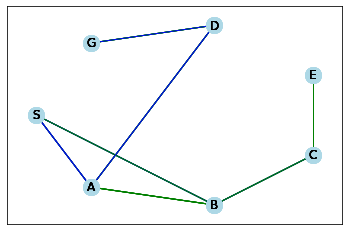

In [197]:
def form_graph(d,FR): #FR is a function pertaining to defined search algos.

    g=nx.Graph()
    g.add_nodes_from(d)
    for i in d.keys():
        for j in d[i].keys():
            g.add_edge(i,j)

    l=[]
    #FR=BMS(d,'S','G',2)
    #FR=dfs(d)
    #FR=branch_and_bound(d,11)
    #FR=A_star_search(d,'S','G',d_h,oracle_cost_heur(d,'S','G',d_h,2))
    for i in FR:
        #print(i)
        st=i[1:]
        tmp=[]
        for c in range(len(i[1:])):

            tmp.append(st[c:c+2])
        tmp.pop(-1)
        l+=[tmp]
    l
    

    print((l))
    return g

def ret_edge(edge):
    
    c=0
    
    #print(edge)
    for i in g.edges:
        #print(i)
        if(edge==list(i) or edge[::-1]==list(i)):
            break
        c+=1
    #edge_col[c]="red"
    return c

def animate(i):
    edge_col=[]
    for j in range(len(g.edges)):
        edge_col+=["green"]
    tmp=edge_col.copy()
    #for i in range(len(l)):
    for j in (l[i]):
            tmp[ret_edge(j)]="blue"
    print(tmp)
        #node=nx.draw_shell(g, list(g.nodes),edge_color=tmp, with_labels=True, font_weight='bold')
    nx.draw_networkx_labels(g,pos)
    node=nx.draw_networkx_nodes(g, pos,nodelist=list(g.nodes), node_size=250,node_color='lightblue')
    edges=nx.draw_networkx_edges(g,pos,edgelist=list(g.edges),edge_color=tmp)
    return node,edges
def Viz(g):
    pos = nx.shell_layout(g)
    g=nx.Graph()
    g.add_nodes_from(d) 
    for i in d.keys():
        for j in d[i].keys():
            g.add_edge(i,j)
    print(g.edges)

    fig=plt.gcf()
    #nx.draw_shell(g, list(g.nodes), with_labels=True, font_weight='bold')

    ani = animation.FuncAnimation(fig, animate, frames=len(l), interval=1000, repeat=True,blit=False)
    #ani.save("D://anim.mp4")
    HTML(ani.to_html5_video(30))


[[10.379999999999999, 'S', 'A'], [11, 'S', 'B'], [20.38, 'S', 'A', 'B'], [18.38, 'S', 'A', 'D'], [22.38, 'S', 'B', 'A'], [22.58, 'S', 'B', 'C'], [23.38, 'S', 'A', 'D', 'G'], [31.96, 'S', 'A', 'B', 'C'], [30.38, 'S', 'B', 'A', 'D'], [inf, 'S', 'B', 'C', 'E'], [35.379999999999995, 'S', 'B', 'A', 'D', 'G']]
['A', 'B', 'D', 'C', 'G']
[[['S', 'A']], [['S', 'B']], [['S', 'A'], ['A', 'D']], [['S', 'B'], ['B', 'C']], [['S', 'A'], ['A', 'D'], ['D', 'G']]]
[('S', 'A'), ('S', 'B'), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'E'), ('D', 'G')]
['blue', 'green', 'green', 'green', 'green', 'green', 'green']
['blue', 'green', 'green', 'green', 'green', 'green', 'green']
['green', 'blue', 'green', 'green', 'green', 'green', 'green']
['blue', 'green', 'green', 'blue', 'green', 'green', 'green']
['green', 'blue', 'green', 'green', 'blue', 'green', 'green']
['blue', 'green', 'green', 'blue', 'green', 'green', 'blue']


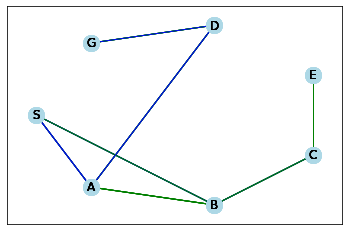

In [198]:
# User Input Space 
# I am not taking user input from console ... feels more interactive to edit the dictionary d and d_h by the user at once 
'''
Template For User

d -> Adjacency Graph with normal weights
d_h -> Adjacency Graph with Heuristics
FR -> Function To Visualise 
Call form_graph()  -> Init Setup
Call Viz(form_graph())  -> or use alias ret val //


'''
d={
    'S':{'A':3,'B':5},
    'A':{'S':3,'B':4,'D':3},
    'B':{'S':5,'A':4,'C':4},
    'C':{'B':4,'E':6},
    'E':{'C':6},
    'D':{'A':3,'G':5},
    'G':{'D':5}
}
d_h={
    'S':{'A':7.38,'B':6},
    'A':{'S':np.inf,'B':6,'D':5},
    'B':{'S':np.inf,'A':7.38,'C':7.58},
    'C':{'B':6,'E':np.inf},
    'E':{'C':7.58},
    'D':{'A':7.38,'G':0},
    'G':{'D':5}
}

FR=A_star_search(d,'S','G',d_h,oracle_cost_heur(d,'S','G',d_h,2))
g=form_graph(d,FR)
Viz(g)